In [128]:
import backproject
import id_generation
import numpy as np
import glob
import cv2
import torch
import matplotlib.pyplot as plt

In [129]:
path_to_traj = "/Users/A200254469/Desktop/tum/2024ws/advancedDL4CV/segment/nice-slam/Datasets/Replica/room0/traj.txt"
T_wc = np.loadtxt(path_to_traj).reshape(-1, 4, 4)

In [130]:
directory = "/home/julius/Project/nice-slam/Datasets/Replica/room0/results"
every_frame= 5

In [131]:
def readDepth(filepath):
    depth=cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
    depth_data = depth.astype(np.float32) / 6553.5
    depth_data = torch.from_numpy(depth_data)
    return depth_data

In [132]:
# color_paths = sorted(glob.glob('/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame*.jpg'))
depth_paths = sorted(
    glob.glob(
        "/Users/A200254469/Desktop/tum/2024ws/advancedDL4CV/segment/nice-slam/Datasets/Replica/room0/results/depth*.png"
    )
)
seg_paths = sorted(
    glob.glob(
        "/Users/A200254469/Desktop/tum/2024ws/advancedDL4CV/segment/nice-slam/segmentation/data/room0/seg*.npy"
    )
)

In [133]:
K = np.array([[600, 0.0, 599.5], [0.0, 600, 339.5], [0.0, 0.0, 1.0]])

In [134]:
#store_path = "/Users/A200254469/Desktop/tum/2024ws/advancedDL4CV/segment/nice-slam/segmentation/our_gen/room0"
seg_path = "/Users/A200254469/Desktop/tum/2024ws/advancedDL4CV/segment/nice-slam/segmentation/data/room0_small"

In [135]:
first = np.load(
    "/Users/A200254469/Desktop/tum/2024ws/advancedDL4CV/segment/nice-slam/segmentation/data/room0_small/seg000000.npy"
)
segmentations = []
segmentations.append(first)
np.unique(first)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71], dtype=int32)

In [136]:
id_counter = len(np.unique(first))
id_counter

72

In [137]:
np.save(store_path + "/seg000000.npy", first)

In [141]:
frame_numbers = [0]
every_frame= 5
ppi = 100
segmentations = []
segmentations.append(first)
id_counter = len(np.unique(first))
every_frame= 5

In [142]:
for i in range(0, 20, every_frame):
    print(f'At iteration {i}')
    ids_curr = np.load(seg_paths[int(i/every_frame)])
    map, id_counter = id_generation.create_complete_mapping_of_current_frame(ids_curr, 5, frame_numbers, T_wc, K, depth_paths, segmentations, id_counter, points_per_instance = ppi)
    ids = id_generation.update_current_frame(ids_curr, map)
    segmentations.append(ids)
    #save output
    frame_numbers.append(i)

At iteration 0
At iteration 5
At iteration 10
At iteration 15


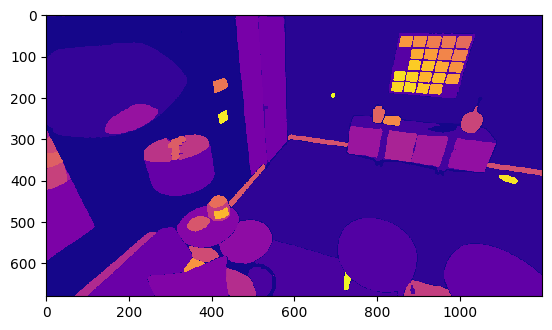

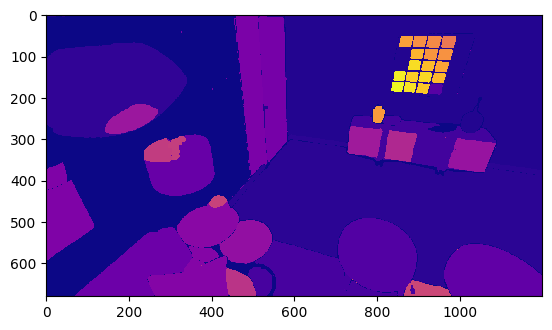

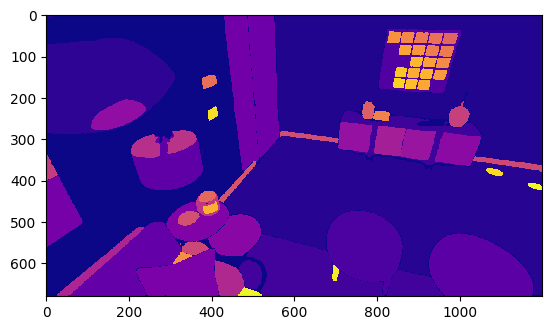

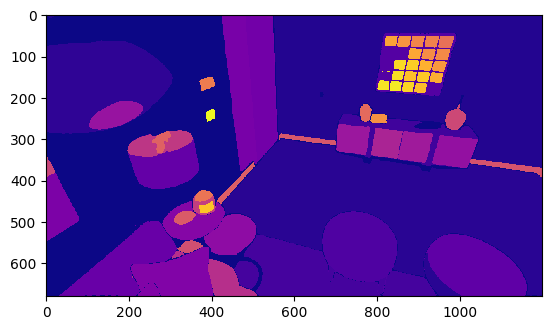

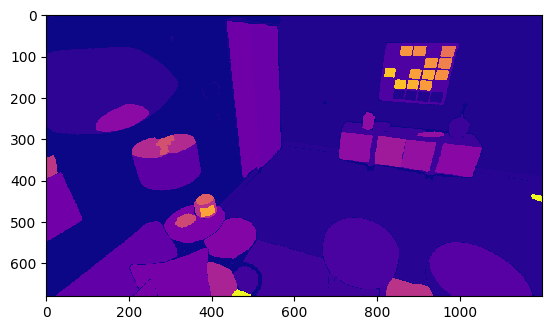

In [143]:
for segment in segmentations:
    plt.imshow(segment,cmap='plasma',interpolation='nearest')
    plt.show()

In [118]:
i = 5
ids_curr = np.load(seg_paths[int(i/every_frame)])


In [119]:
map, id_counter = id_generation.create_complete_mapping_of_current_frame(ids_curr, 5, frame_numbers, T_wc, K, depth_paths, segmentations, id_counter, points_per_instance = 20)

In [120]:
ids = id_generation.update_current_frame(ids_curr, map)

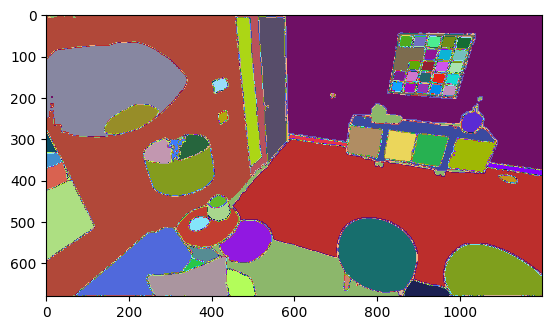

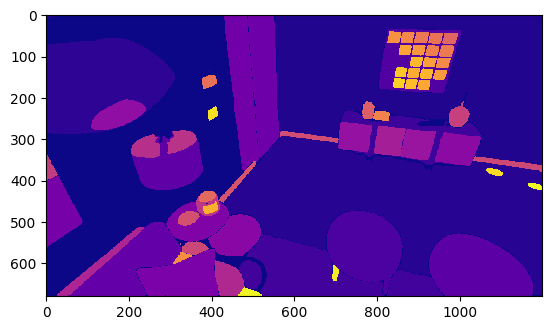

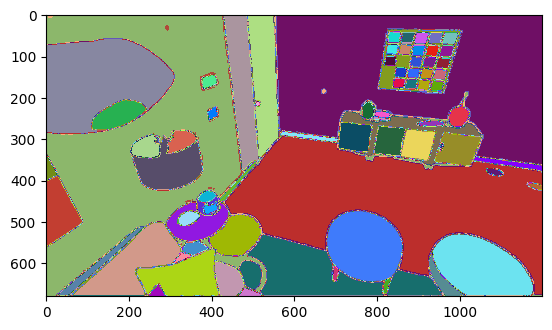

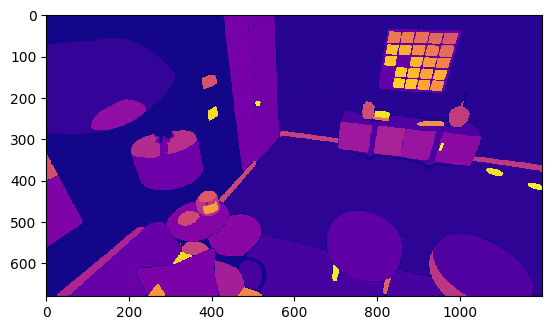

In [121]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from vis import visualizerForIds

visualizerForId = visualizerForIds()
visualizerForId.visualizer(first)
visualizerForId.visualizer(ids_curr)
visualizerForId.visualizer(ids_curr)

visualizerForId.visualizer(ids)

In [122]:
segmentations.append(ids)
#save output
frame_numbers.append(i)

In [123]:
i = 10

ids_curr = np.load(seg_paths[int(i/every_frame)])
np.unique(ids_curr)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86], dtype=int32)

In [124]:
map, id_counter = id_generation.create_complete_mapping_of_current_frame(ids_curr, i, frame_numbers, T_wc, K, depth_paths, segmentations, id_counter, points_per_instance = 1000)

In [125]:
ids = id_generation.update_current_frame(ids_curr, map)

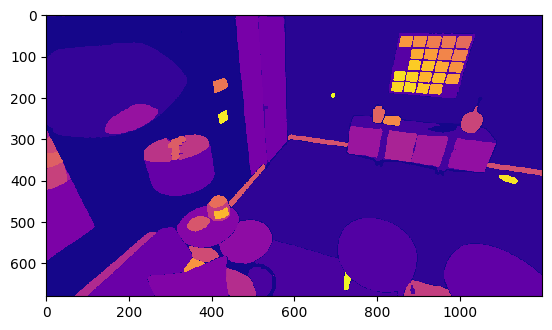

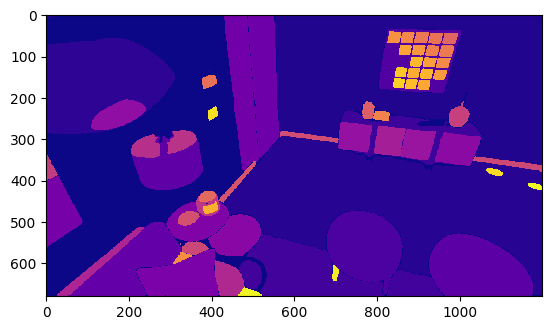

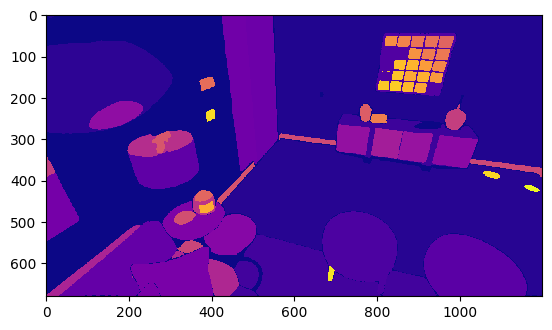

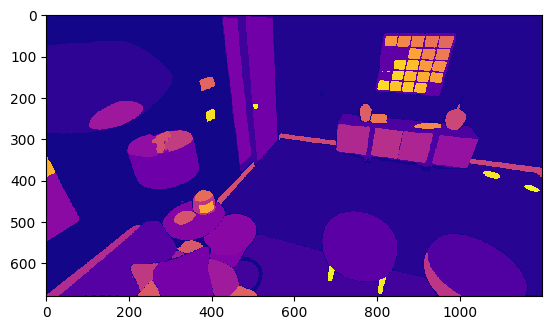

In [126]:
for segment in segmentations:
    plt.imshow(segment,cmap='plasma',interpolation='nearest')
    plt.show()

plt.imshow(ids,cmap='plasma',interpolation='nearest')
plt.show()
plt.imshow(ids_curr,cmap='plasma',interpolation='nearest')

In [127]:
segmentations[0][400,300],segmentations[1][420,300]

(16, 16)